In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import pickle

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data_pred.csv')

In [4]:
x=df.drop(columns='redemp')

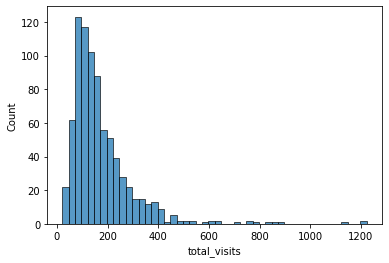

In [ ]:
sns.histplot(df['total_visits'])

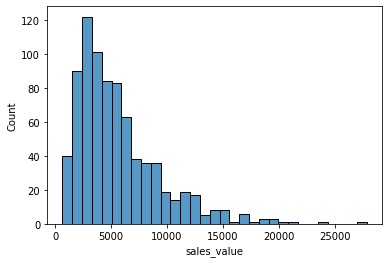

In [ ]:
sns.histplot(df['sales_value'])

In [5]:
x=df.drop(columns='redemp')
y=df['redemp']

In [6]:
x.shape

(801, 19)

In [7]:
y.shape

(801,)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=100)

In [40]:
X_train

,age_desc,income_desc,kid_category_desc,sales_value,total_visits,mar_A,mar_B,mar_U,homeown,probown,probren,homren,homown,1ak,2ak,2a,1f,1m,unknown_hh
254,1,7,3,9036.01,178,1,0,0,1,0,0,0,0,1,0,0,0,0,0
198,2,3,0,646.40,57,0,0,1,0,0,0,0,1,0,0,0,0,1,0
645,2,5,0,2628.10,90,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,5,2,13190.92,275,0,0,1,1,0,0,0,0,0,1,0,0,0,0
660,5,7,0,2937.95,132,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,3,3,0,11920.93,215,0,0,1,1,0,0,0,0,0,0,1,0,0,0
350,1,6,0,5664.74,229,0,1,0,0,0,0,0,1,0,0,0,0,1,0
79,2,3,0,5897.90,130,1,0,0,0,0,0,0,1,0,0,1,0,0,0
792,3,5,0,1770.91,83,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [44]:
X_train.mean()[:5]

age_desc                2.463333
income_desc             3.668333
kid_category_desc       0.535000
sales_value          5671.358833
total_visits          179.571667
dtype: float64

In [51]:
X_train.std(axis=0)[:5]

age_desc                1.254836
income_desc             2.225590
kid_category_desc       0.948828
sales_value          3777.630081
total_visits          132.853911
dtype: float64

In [52]:
pd.DataFrame(X_train.mean()[:5]).to_csv('means.csv')
pd.DataFrame(X_train.std(axis=0)[:5]).to_csv('stds.csv')

In [85]:
#Since the numerical data looks like a skewed gaussian distribution, scaling to mean 0 and Sd 0 makes sense

sd=StandardScaler()

X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])
X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [86]:
#sd=StandardScaler()
#pipeline = Pipeline([('transformera', sd), ('estimator', LogisticRegression())])
estimator__solver = ['newton-cg', 'lbfgs', 'liblinear']
estimator__penalty = ['l2']
estimator__C = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=estimator__solver,penalty=estimator__penalty,C=estimator__C)

In [87]:
grid_search=GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [88]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.593856 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [89]:
mod=LogisticRegression(penalty='l2',C=0.01,solver='newton-cg').fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.7916666666666666

In [90]:
pkl_filename = "logisticregression.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [66]:
p_log=precision_score(y_test,ypred)

In [67]:
accuracy_score(y_test,ypred)

0.6368159203980099

In [68]:
a_log=accuracy_score(y_test,ypred)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=100)

In [92]:
def naturalNumbers(n):
    return [i+1 for i in range(n)]

In [93]:
mod=DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best','random']
max_depth=naturalNumbers(10)
min_samples_leaf=naturalNumbers(5)
max_features=['auto','sqrt','None','log2']
grid=dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features)

In [94]:
#cv=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [95]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.658333 using {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'splitter': 'random'}


In [96]:
mod=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, max_features= 'auto', min_samples_leaf= 3, splitter= 'random',random_state=100)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.6666666666666666

In [97]:
accuracy_score(y_test,ypred)

0.572139303482587

In [98]:
p_tree=precision_score(y_test,ypred)
a_tree=accuracy_score(y_test,ypred)

In [99]:
pkl_filename = "decisiontree.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [100]:
mod=RandomForestClassifier()
n_estimators = [10,25,50,75,100,200,250]
max_features = ['sqrt', 'log2']
criterion=['gini','entropy']
max_depth=[3,5,7,9]
#min_samples_leaf=naturalNumbers(15)
grid=dict(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features,n_estimators=n_estimators)

In [101]:
#cv=StratifiedKFold(n_splits=4)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [102]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.663681 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 10}


In [103]:
mod=RandomForestClassifier(criterion=grid_result.best_params_['criterion'],max_depth=grid_result.best_params_['max_depth'],max_features=grid_result.best_params_['max_features'],\
                           min_samples_leaf=grid_result.best_params_['min_samples_leaf'] , n_estimators=grid_result.best_params_['n_estimators']).fit(X_train,y_train)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.5636363636363636

In [104]:
accuracy_score(y_test,ypred)

0.6019900497512438

In [105]:
p_for=precision_score(y_test,ypred)
a_for=accuracy_score(y_test,ypred)

In [106]:
pkl_filename = "randomforest.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [ ]:
#Gradient Boost

In [107]:
mod=GradientBoostingClassifier()
learning_rate = [0, 0.25, 0.5, 0.7, 0.9, 1.0]
max_depth = [3, 7, 9,11]
subsample = [0.5, 0.7, 1.0]
n_estimators = [10,25,50,75,100,150]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

In [108]:
#cv=StratifiedKFold(n_splits=4)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [109]:
print("Best: %f using %s  " % (grid_result.best_score_, grid_result.best_params_))

Best: 0.566083 using {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}  


In [110]:
mod=GradientBoostingClassifier(learning_rate=grid_result.best_params_['learning_rate'],max_depth=grid_result.best_params_['max_depth'],\
                               n_estimators=grid_result.best_params_['n_estimators'],subsample=grid_result.best_params_['subsample']).fit(X_train,y_train)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.611764705882353

In [111]:
p_xg=precision_score(y_test,ypred)
a_xg=accuracy_score(y_test,ypred)

In [112]:
pkl_filename = "gradientboost.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
p=[p_log,p_tree,p_for,p_xg]
a=[a_log,a_tree,a_for,a_xg]
mod=['Log Regression', 'Decision Tree', 'Random Forest','xGBoost']

In [144]:
p.sort(reverse=True)
a.sort(reverse=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


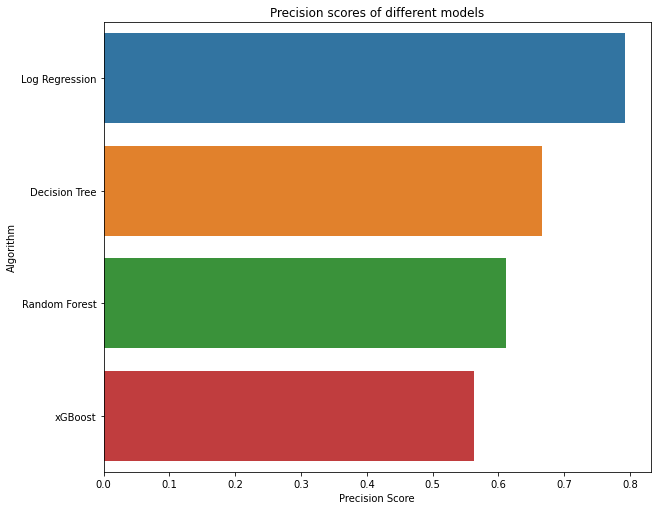

In [143]:
a4_dims = (9.8, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(p,mod,orient='h')
ax.set(xlabel='Precision Score',ylabel='Algorithm')
plt.title('Precision scores of different models')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


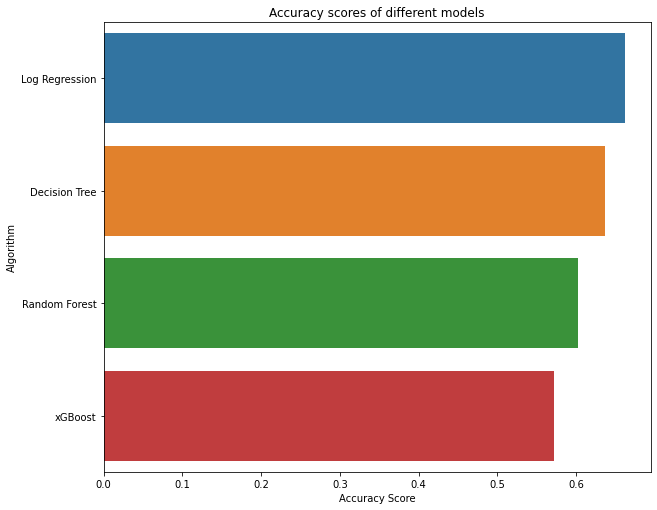

In [145]:
a4_dims = (9.8, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(a,mod,orient='h')
ax.set(xlabel='Accuracy Score',ylabel='Algorithm')
plt.title('Accuracy scores of different models')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=100)
C = [100, 10, 1.0, 0.1, 0.01]
#Since the numerical data looks like a skewed gaussian distribution, scaling to mean 0 and Sd 0 makes sense

sd=StandardScaler()

X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])
X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])


In [148]:
p=[]
for i in range(len(C)):
  mod=LogisticRegression(C=C[i]).fit(X_train,y_train)
  mod.fit(X_train,y_train)
  ypred=mod.predict(X_test)
  p.append(precision_score(y_test,ypred))

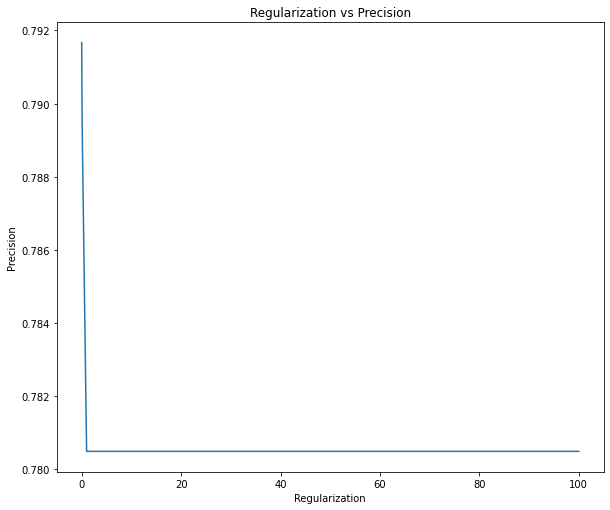

In [150]:
a4_dims = (9.8, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.lineplot(x=C,y=p)
ax.set(xlabel='Regularization',ylabel='Precision')
plt.title('Regularization vs Precision')
plt.show()

In [151]:
a=[]
for i in range(len(C)):
  mod=LogisticRegression(C=C[i]).fit(X_train,y_train)
  mod.fit(X_train,y_train)
  ypred=mod.predict(X_test)
  a.append(accuracy_score(y_test,ypred))

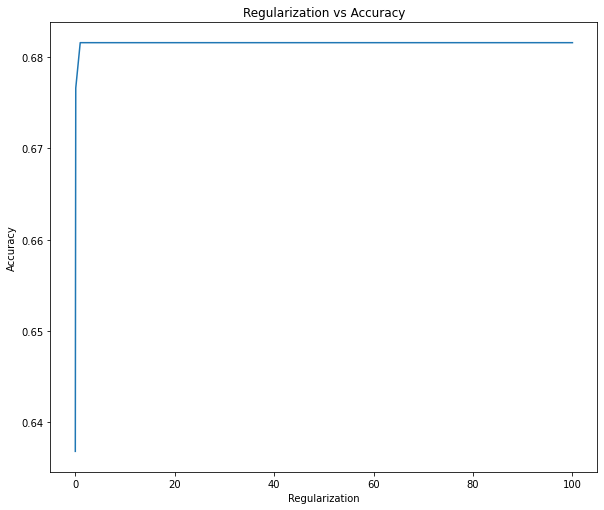

In [153]:
a4_dims = (9.8, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.lineplot(x=C,y=a)
ax.set(xlabel='Regularization',ylabel='Accuracy')
plt.title('Regularization vs Accuracy')
plt.show()